# Mini-projet 3
Prediction émission CO2

In [1]:
import pandas as pd

### Importation et traitement de notre dataset 
On utilise une dataset issue du site https://www.data.gouv.fr/fr/datasets/emissions-de-co2-et-de-polluants-des-vehicules-commercialises-en-france/ contenant différentes caractéristiques de véhicules dont leur émission de CO2, de CO et de NOx

In [2]:
df = pd.read_csv('fic_etiq_edition_40-mars-2015.csv')
df2 = pd.read_csv('cleaned_2013.csv')


In [3]:
df.columns

Index(['lib_mrq_doss', 'lib_mod_doss', 'mrq_utac', 'mod_utac', 'dscom', 'cnit',
       'tvv', 'energ', 'hybride', 'puiss_admin', 'puiss_max', 'puiss_heure',
       'typ_boite_nb_rapp', 'conso_urb_93', 'conso_exurb', 'conso_mixte',
       'co2_mixte', 'co_typ_1', 'hc', 'nox', 'hcnox', 'ptcl',
       'masse_ordma_min', 'masse_ordma_max', 'champ_v9', 'date_maj',
       'Unnamed: 26', 'Unnamed: 27'],
      dtype='object')

In [4]:
df.shape

(20880, 28)

In [5]:
df.head(2)

lib_mrq_doss lib_mod_doss     mrq_utac mod_utac                      dscom  \
0  ALFA ROMEO           159  ALFA ROMEO       159      159 1750 Tbi (200ch)    
1  ALFA ROMEO           159  ALFA ROMEO       159  159 2.0 JTDm (170ch) ECO    

               cnit           tvv energ hybride puiss_admin  ...     hc  \
0  M10ALFVP000G340   939AXN1B52C    ES     non           12  ...  0.052   
1  M10ALFVP000U221   939AXP1B54C    GO     non            9  ...    NaN   

     nox hcnox   ptcl masse_ordma_min  masse_ordma_max  \
0  0.032   NaN  0.002          1505.0             1505   
1  0.169  0.19  0.003          1565.0             1565   

                  champ_v9  date_maj  Unnamed: 26  Unnamed: 27  
0  715/2007*692/2008EURO5    juin-14          NaN          NaN  
1  715/2007*692/2008EURO5    juin-14          NaN          NaN  

[2 rows x 28 columns]

In [6]:
df_cleaned = df.drop(['lib_mrq_doss','mod_utac','dscom','cnit','tvv','hc','hcnox','masse_ordma_max','date_maj','Unnamed: 26','Unnamed: 27','puiss_heure'],axis=1)

In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20880 entries, 0 to 20879
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mod_doss       20880 non-null  object 
 1   mrq_utac           20880 non-null  object 
 2   energ              20880 non-null  object 
 3   hybride            20880 non-null  object 
 4   puiss_admin        20880 non-null  object 
 5   puiss_max          20824 non-null  object 
 6   typ_boite_nb_rapp  20851 non-null  object 
 7   conso_urb_93       20756 non-null  object 
 8   conso_exurb        20759 non-null  object 
 9   conso_mixte        20824 non-null  float64
 10  co2_mixte          20824 non-null  float64
 11  co_typ_1           20605 non-null  float64
 12  nox                20602 non-null  float64
 13  ptcl               19144 non-null  float64
 14  masse_ordma_min    20877 non-null  float64
 15  champ_v9           20880 non-null  object 
dtypes: float64(6), object(

In [8]:
#élimination des lignes contenant des données manquante
df_without_na = df_cleaned.dropna()

In [9]:
df_without_na.shape

(19078, 16)

### Séparation de la colonne typ_boite_nb_rapp en une colonne type de boite et nombre de rapports

In [10]:
df_without_na.typ_boite_nb_rapp.value_counts()
# M et D = manuel
# A automatique

A 7     8895
M 6     6926
A 8      980
A 9      687
A 6      674
M 5      446
V 0      214
A 5       88
M 7       80
D 7       44
V .       24
D 5       14
D 6        6
Name: typ_boite_nb_rapp, dtype: int64

In [11]:
df_without_na['nb_rapp'] = df_without_na.typ_boite_nb_rapp

<ipython-input-11-135df9c86656>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_na['nb_rapp'] = df_without_na.typ_boite_nb_rapp


In [12]:
df_without_na = df_without_na.drop(df_without_na[(df_without_na.typ_boite_nb_rapp == 'V 0 ') | (df_without_na.typ_boite_nb_rapp == 'V . ')].index)

In [13]:
df_without_na.typ_boite_nb_rapp[df_without_na.typ_boite_nb_rapp.str.contains("A")] = "A"
df_without_na.typ_boite_nb_rapp[df_without_na.typ_boite_nb_rapp != 'A'] = 'M'

<ipython-input-13-2e19400e69f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_na.typ_boite_nb_rapp[df_without_na.typ_boite_nb_rapp.str.contains("A")] = "A"
<ipython-input-13-2e19400e69f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_na.typ_boite_nb_rapp[df_without_na.typ_boite_nb_rapp != 'A'] = 'M'


In [14]:
df_without_na.nb_rapp = df_without_na.nb_rapp.apply(lambda x : x[2])

In [15]:
df_without_na.head(2)

lib_mod_doss     mrq_utac energ hybride puiss_admin puiss_max  \
0          159  ALFA ROMEO    ES     non           12       147   
1          159  ALFA ROMEO    GO     non            9       125   

  typ_boite_nb_rapp conso_urb_93 conso_exurb  conso_mixte  co2_mixte  \
0                 M         11.3         5.8          7.8      182.0   
1                 M          6.6         4.3          5.1      136.0   

   co_typ_1    nox   ptcl  masse_ordma_min                 champ_v9 nb_rapp  
0     0.647  0.032  0.002           1505.0  715/2007*692/2008EURO5        6  
1     0.192  0.169  0.003           1565.0  715/2007*692/2008EURO5        6

### Renommage des différentes colonnes en des noms plus explicites

In [16]:
df_without_na.columns

Index(['lib_mod_doss', 'mrq_utac', 'energ', 'hybride', 'puiss_admin',
       'puiss_max', 'typ_boite_nb_rapp', 'conso_urb_93', 'conso_exurb',
       'conso_mixte', 'co2_mixte', 'co_typ_1', 'nox', 'ptcl',
       'masse_ordma_min', 'champ_v9', 'nb_rapp'],
      dtype='object')

In [17]:
df_without_na.columns = ['modele', 'marque', 'energie', 'hybride', 'puiss_admin',
       'p_kw', 'typ_boite', 'conso_urbaine', 'conso_autoroute',
       'conso_mixte', 'co2', 'co', 'nox', 'part_fine',
       'poids', 'norme', 'nb_rapp']

In [18]:
df_without_na.sample(3)

modele     marque energie hybride puiss_admin p_kw typ_boite  \
15551  SPRINTER   MERCEDES      GO     non            8   95         M   
19659    MEGANE    RENAULT      GO     non            6   96         M   
10492  CLASSE E   MERCEDES      GO     non            7  100         A   

      conso_urbaine conso_autoroute  conso_mixte    co2     co    nox  \
15551           7.9             5.9          6.6  171.0  0.261  0.317   
19659           4.8             3.6          4.0  104.0  0.232  0.106   
10492             6             4.3          5.0  129.0  0.068  0.165   

       part_fine   poids                    norme nb_rapp  
15551      0.004  2450.0   595/2009*64/2012EURO6        6  
19659      0.001  1395.0  715/2007*195/2013EURO5        6  
10492      0.000  1735.0  715/2007*195/2013EURO5        7

### Conversion des colonnes de type objet en colonne de type int

In [19]:
df_without_na.loc[df_without_na['norme'].str.contains('EURO5'), 'norme'] = '0'
df_without_na.loc[df_without_na['norme'].str.contains('EURO6'), 'norme'] = '1'

In [20]:
df_without_na.loc[df_without_na['typ_boite'].str.contains('M'), 'typ_boite'] = '0'
df_without_na.loc[df_without_na['typ_boite'].str.contains('A'), 'typ_boite'] = '1'
df_without_na.loc[df_without_na['hybride'].str.contains('non'), 'hybride'] = '0'
df_without_na.loc[df_without_na['hybride'].str.contains('oui'), 'hybride'] = '1'


In [21]:
df_without_na.norme = pd.to_numeric(df_without_na.norme, errors='ignore')
df_without_na.nb_rapp = pd.to_numeric(df_without_na.nb_rapp, errors='ignore')
df_without_na.conso_urbaine = pd.to_numeric(df_without_na.conso_urbaine, errors='ignore')
df_without_na.conso_autoroute = pd.to_numeric(df_without_na.conso_autoroute, errors='ignore')
#df_without_na.conso_mixte = pd.to_numeric(df_without_na.conso_mixte, errors='ignore')
df_without_na.puiss_admin = pd.to_numeric(df_without_na.puiss_admin, errors='ignore')
df_without_na.p_kw = pd.to_numeric(df_without_na.p_kw, errors='ignore')
df_without_na.hybride = pd.to_numeric(df_without_na.hybride, errors='ignore')
df_without_na.typ_boite = pd.to_numeric(df_without_na.typ_boite, errors='ignore')

In [22]:
#Réunions des catégories ES et ES/GN de la colonne energie en une seule catégorie
#df_without_na.loc[df_without_na['energie'].str.contains('ES/GN '), 'energie'] = 'ES'
df_without_na.loc[df_without_na['energie'].str.contains('ES'), 'energie'] = 'ES'

In [23]:
df_without_na.energie.value_counts()

GO     12487
ES      5838
GH       386
EH       103
EE        26
Name: energie, dtype: int64

In [24]:
df_without_na = df_without_na.drop('hybride',axis=1)

In [25]:
df_without_na.head()

modele       marque energie  puiss_admin   p_kw  typ_boite  conso_urbaine  \
0    159  ALFA ROMEO       ES           12  147.0          0           11.3   
1    159  ALFA ROMEO      GO             9  125.0          0            6.6   
2    159  ALFA ROMEO      GO             7  100.0          0            6.6   
3    159  ALFA ROMEO      GO             7  100.0          0            6.6   
4    159  ALFA ROMEO      GO             9  125.0          0            6.9   

   conso_autoroute  conso_mixte    co2     co    nox  part_fine   poids  \
0              5.8          7.8  182.0  0.647  0.032      0.002  1505.0   
1              4.3          5.1  136.0  0.192  0.169      0.003  1565.0   
2              4.2          5.1  134.0  0.066  0.149      0.001  1565.0   
3              4.2          5.1  134.0  0.066  0.149      0.001  1565.0   
4              4.3          5.3  139.0  0.060  0.164      0.001  1565.0   

   norme  nb_rapp  
0      0        6  
1      0        6  
2      0        6  
3      0        6  
4      0        6

In [26]:
df_without_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18840 entries, 0 to 20879
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   modele           18840 non-null  object 
 1   marque           18840 non-null  object 
 2   energie          18840 non-null  object 
 3   puiss_admin      18840 non-null  int64  
 4   p_kw             18840 non-null  float64
 5   typ_boite        18840 non-null  int64  
 6   conso_urbaine    18840 non-null  float64
 7   conso_autoroute  18840 non-null  float64
 8   conso_mixte      18840 non-null  float64
 9   co2              18840 non-null  float64
 10  co               18840 non-null  float64
 11  nox              18840 non-null  float64
 12  part_fine        18840 non-null  float64
 13  poids            18840 non-null  float64
 14  norme            18840 non-null  int64  
 15  nb_rapp          18840 non-null  int64  
dtypes: float64(9), int64(4), object(3)
memory usage: 2.4+ MB


In [27]:
#élimination des lignes en double
df_without_duplicates = df_without_na.drop_duplicates()

In [28]:
df_without_duplicates.marque.value_counts()

MERCEDES        1850
BMW              590
AUDI             374
VOLKSWAGEN       261
CITROEN          228
FORD             180
PEUGEOT          165
FIAT             162
PORSCHE          161
RENAULT          143
OPEL             143
MINI             127
SKODA            121
SEAT              97
VOLVO             92
NISSAN            73
LAND ROVER        50
KIA               50
HYUNDAI           48
TOYOTA            48
MAZDA             41
ALFA ROMEO        37
JAGUAR            35
FERRARI           35
HONDA             21
DACIA             21
MITSUBISHI        20
LEXUS             19
INFINITI          16
LANCIA            16
JEEP              13
MASERATI          12
SUZUKI            10
ROLLS ROYCE        9
CADILLAC           7
BENTLEY            7
SSANGYONG          6
SUBARU             6
CHEVROLET          2
LAMBORGHINI        1
Name: marque, dtype: int64

In [224]:
# df2013 is already cleaned with the same process (DF_2013.ipynb)
#df2013 = df2.drop(['hybride','puiss_admin','conso_urbaine','conso_autoroute'],axis=1)
df2013 = df2.drop('hybride',axis=1)
df2013.energie.loc[df2013['energie'] == 'GO'] = 'GO '
df2013.energie.loc[df2013['energie'] == 'GH'] = 'GH '
df2013.energie.loc[df2013['energie'] == 'EH'] = 'EH '
df2013 = df2013[(df2013.norme == '0') | (df2013.norme == '1')]
df2013.norme = pd.to_numeric(df2013.norme, errors='ignore')

full_df = pd.concat([df_without_duplicates,df2013])
full_df.head()

/home/osboxes/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


modele  marque energie  puiss_admin   p_kw  typ_boite  conso_urbaine  \
0    159  OTHERS      ES           12  147.0          0           11.3   
1    159  OTHERS     GO             9  125.0          0            6.6   
2    159  OTHERS     GO             7  100.0          0            6.6   
4    159  OTHERS     GO             9  125.0          0            6.9   
6    159  OTHERS      ES           12  147.0          0           11.5   

   conso_autoroute  conso_mixte    co2     co    nox  part_fine   poids  \
0              5.8          7.8  182.0  0.647  0.032      0.002  1505.0   
1              4.3          5.1  136.0  0.192  0.169      0.003  1565.0   
2              4.2          5.1  134.0  0.066  0.149      0.001  1565.0   
4              4.3          5.3  139.0  0.060  0.164      0.001  1565.0   
6              6.0          8.0  186.0  0.647  0.032      0.002  1555.0   

   norme  nb_rapp  
0      0        6  
1      0        6  
2      0        6  
4      0        6  
6      0        6

In [225]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9839 entries, 0 to 4582
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   modele           9839 non-null   object 
 1   marque           9839 non-null   object 
 2   energie          9839 non-null   object 
 3   puiss_admin      9839 non-null   int64  
 4   p_kw             9839 non-null   float64
 5   typ_boite        9839 non-null   int64  
 6   conso_urbaine    9839 non-null   float64
 7   conso_autoroute  9839 non-null   float64
 8   conso_mixte      9839 non-null   float64
 9   co2              9839 non-null   float64
 10  co               9839 non-null   float64
 11  nox              9839 non-null   float64
 12  part_fine        9839 non-null   float64
 13  poids            9839 non-null   float64
 14  norme            9839 non-null   int64  
 15  nb_rapp          9839 non-null   int64  
dtypes: float64(9), int64(4), object(3)
memory usage: 1.3+ MB


## Analyse de données

In [30]:
from pandas_profiling import ProfileReport

profile = ProfileReport(full_df, title="Pandas Profiling Report")

In [31]:
profile

<AxesSubplot:>

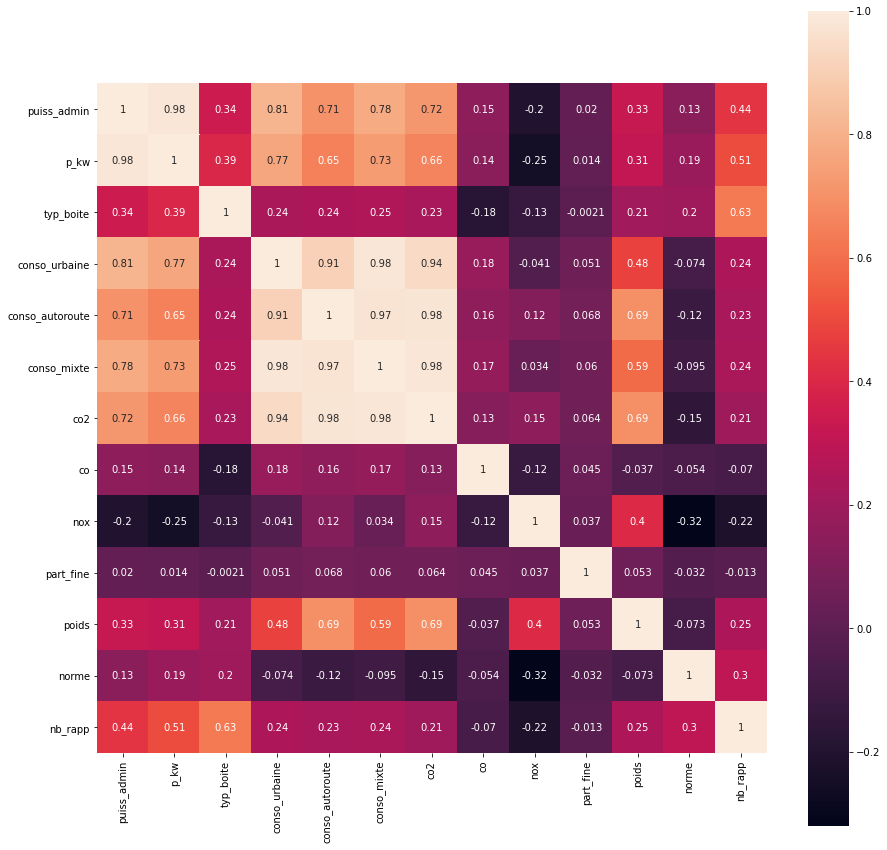

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(full_df.corr(), annot=True, square=True)

# Hypothèse :
- Le poids, la puissance, norme sont corrélés aux émissions de gaz
- Les véhicules qui sont Diesel émettent + de particules fines et émettent moins de CO2
- Les véhicules allemands, premiums le plus souvent, devraient émettrent plus.
- Les véhicules hybrides et électriques émettent moins de gaz

In [227]:
full_df.sample()

modele marque energie  puiss_admin  p_kw  typ_boite  conso_urbaine  \
941  DOKKER  DACIA      ES            6  85.0          0            7.1   

     conso_autoroute  conso_mixte    co2     co    nox  part_fine   poids  \
941              5.1          5.8  135.0  0.162  0.023        0.0  1280.0   

     norme  nb_rapp  
941      0        5

In [228]:
full_df.describe()

puiss_admin         p_kw    typ_boite  conso_urbaine  conso_autoroute  \
count  9839.000000  9839.000000  9839.000000    9839.000000      9839.000000   
mean     11.704645   138.660159     0.497002       7.839467         5.294908   
std       8.770397    74.544797     0.500016       2.869307         1.342863   
min       3.000000    40.000000     0.000000       0.000000         2.600000   
25%       7.000000    94.000000     0.000000       5.800000         4.300000   
50%       9.000000   120.000000     0.000000       7.300000         5.000000   
75%      12.000000   150.000000     1.000000       9.000000         6.200000   
max      80.000000   585.000000     1.000000      25.600000        11.800000   

       conso_mixte          co2           co          nox    part_fine  \
count  9839.000000  9839.000000  9839.000000  9839.000000  9839.000000   
mean      6.227106   156.079073     0.256061     0.110079     0.000931   
std       1.863541    43.038352     0.133603     0.129749     0.007685   
min       1.800000    48.000000     0.000000     0.000000     0.000000   
25%       4.800000   124.000000     0.162000     0.032000     0.000000   
50%       5.900000   148.000000     0.241000     0.098000     0.000000   
75%       7.200000   183.000000     0.326500     0.160000     0.001000   
max      16.300000   380.000000     0.931000     1.846000     0.610000   

             poids        norme      nb_rapp  
count  9839.000000  9839.000000  9839.000000  
mean   1711.354508     0.348308     6.398414  
std     336.325347     0.476458     0.840878  
min     845.000000     0.000000     5.000000  
25%    1475.000000     0.000000     6.000000  
50%    1645.000000     0.000000     6.000000  
75%    1945.000000     1.000000     7.000000  
max    2765.000000     1.000000     9.000000

In [229]:
# We have to remove nox outliers
full_df = full_df[full_df.nox < 0.5]
# We have to remove part_fine outliers
full_df = full_df[full_df.part_fine < 0.01]

full_df### - Les Diesels émettent plus de particules fines et moins de CO2

In [230]:
full_df.describe()

puiss_admin         p_kw    typ_boite  conso_urbaine  conso_autoroute  \
count  9767.000000  9767.000000  9767.000000    9767.000000      9767.000000   
mean     11.722945   138.923139     0.498413       7.826929         5.282748   
std       8.798192    74.731819     0.500023       2.873974         1.338448   
min       3.000000    40.000000     0.000000       0.000000         2.600000   
25%       7.000000    95.000000     0.000000       5.800000         4.200000   
50%       9.000000   120.000000     0.000000       7.300000         5.000000   
75%      12.000000   150.000000     1.000000       9.000000         6.200000   
max      80.000000   585.000000     1.000000      25.600000        11.800000   

       conso_mixte          co2           co          nox    part_fine  \
count  9767.000000  9767.000000  9767.000000  9767.000000  9767.000000   
mean      6.214672   155.693355     0.255929     0.103344     0.000738   
std       1.862934    42.904273     0.133134     0.077899     0.000948   
min       1.800000    48.000000     0.000000     0.000000     0.000000   
25%       4.800000   123.500000     0.163000     0.032000     0.000000   
50%       5.900000   147.000000     0.241000     0.075000     0.000000   
75%       7.200000   181.000000     0.323000     0.159000     0.001000   
max      16.300000   380.000000     0.931000     0.317000     0.005000   

             poids        norme      nb_rapp  
count  9767.000000  9767.000000  9767.000000  
mean   1706.815604     0.350875     6.401761  
std     332.516369     0.477268     0.841741  
min     845.000000     0.000000     5.000000  
25%    1475.000000     0.000000     6.000000  
50%    1640.000000     0.000000     6.000000  
75%    1940.000000     1.000000     7.000000  
max    2765.000000     1.000000     9.000000

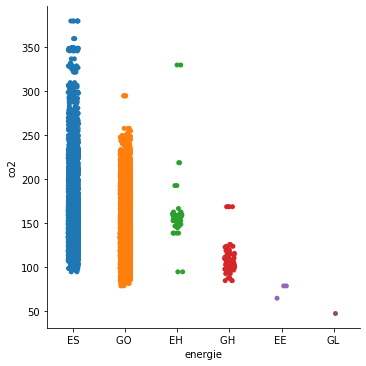

In [231]:
sns.catplot(x="energie", y="co2", data=full_df)

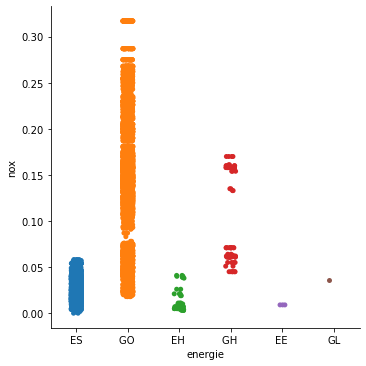

In [232]:
sns.catplot(x="energie", y="nox", data=full_df)

<AxesSubplot:xlabel='energie', ylabel='co2'>

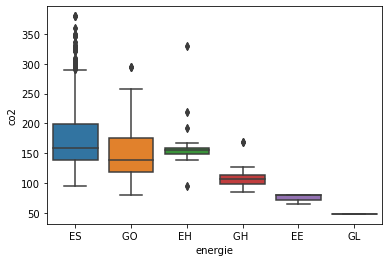

In [233]:
sns.boxplot(x="energie", y="co2", data=full_df)

<AxesSubplot:xlabel='energie', ylabel='nox'>

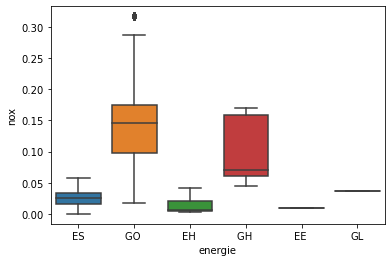

In [234]:
sns.boxplot(x="energie", y="nox", data=full_df)

<AxesSubplot:xlabel='energie', ylabel='co'>

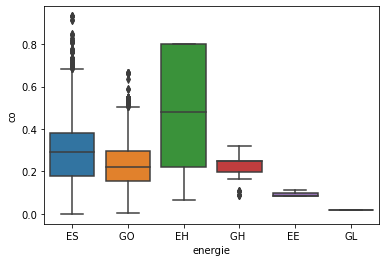

In [235]:
sns.boxplot(x="energie", y="co", data=full_df)

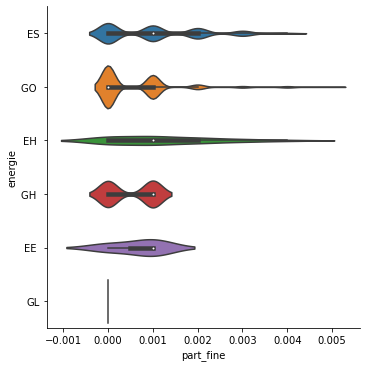

In [236]:
sns.catplot(x="part_fine", y="energie",
            kind="violin", split=True, data=full_df)

### Correlation p_kw, consommation mixte et CO2

<AxesSubplot:xlabel='p_kw', ylabel='conso_mixte'>

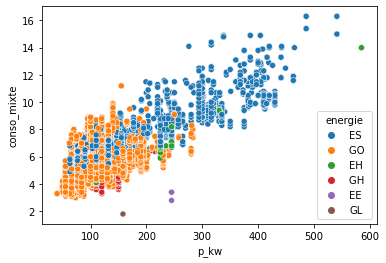

In [237]:
sns.scatterplot(x="p_kw", y="conso_mixte", data=full_df, hue='energie')

<AxesSubplot:xlabel='co2', ylabel='conso_mixte'>

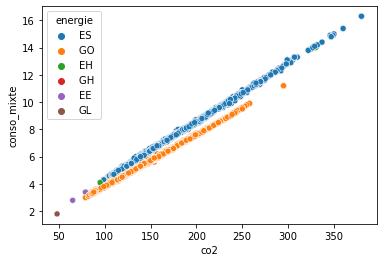

In [238]:
sns.scatterplot(x="co2", y="conso_mixte", data=full_df, hue='energie')

In [239]:
full_df.energie.value_counts()

GO     6409
ES     3221
GH       85
EH       48
EE        3
GL        1
Name: energie, dtype: int64

# Les véhicules allemand émettent plus

In [240]:
df_without_duplicates.groupby('marque')

In [241]:
#df_ohe = pd.get_dummies(df_without_duplicates, columns=['energie'])
#df_ohe

In [242]:
full_df.marque.value_counts()

MERCEDES                     1850
MERCEDES-BENZ                1377
OTHERS                        792
BMW                           590
BMW                           505
AUDI                          374
VOLKSWAGEN                    359
VOLKSWAGEN                    261
CITROEN                       228
AUDI                          217
FORD                          206
FORD                          180
PEUGEOT                       165
FIAT                          162
PORSCHE                       161
SKODA                         157
OPEL                          154
CITROEN                       145
OPEL                          143
RENAULT                       143
FIAT                          131
PEUGEOT                       127
MINI                          127
SKODA                         121
RENAULT                       119
NISSAN                        108
VOLVO                          90
SEAT                           86
PORSCHE                        82
MINI          

## Préparation de la donnée pour le ML
Il y a trop de marques différentes pour pouvoir faire du One Hot Encoding, nous allons garder les marques présentes plus de 100 fois dans notre data frame et mettre les autres dans une catégorie OTHER

In [243]:
plus100 = ['MERCEDES ', 'BMW ', 'AUDI ', 'VOLKSWAGEN ', 'CITROEN ', 'FORD ', 'PEUGEOT ',
           'FIAT ', 'PORSCHE ', 'OPEL ', 'RENAULT ', 'MINI ', 'SKODA ']

full_df.marque[~full_df.marque.isin(plus100)] = 'OTHERS'

In [244]:
full_df.marque.value_counts()

OTHERS         5262
MERCEDES       1850
BMW             590
AUDI            374
VOLKSWAGEN      261
CITROEN         228
FORD            180
PEUGEOT         165
FIAT            162
PORSCHE         161
OPEL            143
RENAULT         143
MINI            127
SKODA           121
Name: marque, dtype: int64

Les catégories Essences et Gazole de notre colonne energie étant majoritaire, nous allons limiter le ML à ces deux catégories

In [245]:
top_energie = ['ES', 'GO ']
df_energie_cleaned = full_df[full_df.energie.isin(top_energie)]

In [246]:
df_energie_cleaned.head()

modele  marque energie  puiss_admin   p_kw  typ_boite  conso_urbaine  \
0    159  OTHERS      ES           12  147.0          0           11.3   
1    159  OTHERS     GO             9  125.0          0            6.6   
2    159  OTHERS     GO             7  100.0          0            6.6   
4    159  OTHERS     GO             9  125.0          0            6.9   
6    159  OTHERS      ES           12  147.0          0           11.5   

   conso_autoroute  conso_mixte    co2     co    nox  part_fine   poids  \
0              5.8          7.8  182.0  0.647  0.032      0.002  1505.0   
1              4.3          5.1  136.0  0.192  0.169      0.003  1565.0   
2              4.2          5.1  134.0  0.066  0.149      0.001  1565.0   
4              4.3          5.3  139.0  0.060  0.164      0.001  1565.0   
6              6.0          8.0  186.0  0.647  0.032      0.002  1555.0   

   norme  nb_rapp  
0      0        6  
1      0        6  
2      0        6  
4      0        6  
6      0        6

In [247]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9767 entries, 0 to 4582
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   modele           9767 non-null   object 
 1   marque           9767 non-null   object 
 2   energie          9767 non-null   object 
 3   puiss_admin      9767 non-null   int64  
 4   p_kw             9767 non-null   float64
 5   typ_boite        9767 non-null   int64  
 6   conso_urbaine    9767 non-null   float64
 7   conso_autoroute  9767 non-null   float64
 8   conso_mixte      9767 non-null   float64
 9   co2              9767 non-null   float64
 10  co               9767 non-null   float64
 11  nox              9767 non-null   float64
 12  part_fine        9767 non-null   float64
 13  poids            9767 non-null   float64
 14  norme            9767 non-null   int64  
 15  nb_rapp          9767 non-null   int64  
dtypes: float64(9), int64(4), object(3)
memory usage: 1.6+ MB


Notre data est prêtes pour du One Hot Encoding sur la colonne marque

In [248]:
df_ohe2 = pd.get_dummies(df_energie_cleaned, columns=['marque'])
df_ohe2

modele energie  puiss_admin   p_kw  typ_boite  conso_urbaine  \
0       159      ES           12  147.0          0           11.3   
1       159     GO             9  125.0          0            6.6   
2       159     GO             7  100.0          0            6.6   
4       159     GO             9  125.0          0            6.9   
6       159      ES           12  147.0          0           11.5   
...     ...     ...          ...    ...        ...            ...   
4578   XC70     GO            12  158.0          0            6.1   
4579   XC70     GO            10  120.0          1            8.6   
4580   XC70     GO             9  120.0          0            6.1   
4581   XC70     GO             9  120.0          1            7.7   
4582   XC70     GO             9  120.0          0            6.8   

      conso_autoroute  conso_mixte    co2     co  ...  marque_FORD   \
0                 5.8          7.8  182.0  0.647  ...             0   
1                 4.3          5.1  136.0  0.192  ...             0   
2                 4.2          5.1  134.0  0.066  ...             0   
4                 4.3          5.3  139.0  0.060  ...             0   
6                 6.0          8.0  186.0  0.647  ...             0   
...               ...          ...    ...    ...  ...           ...   
4578              4.8          5.3  139.0  0.285  ...             0   
4579              5.2          6.4  169.0  0.344  ...             0   
4580              4.8          5.3  139.0  0.285  ...             0   
4581              4.8          5.9  154.0  0.243  ...             0   
4582              4.5          5.3  139.0  0.268  ...             0   

      marque_MERCEDES   marque_MINI   marque_OPEL   marque_OTHERS  \
0                    0             0             0              1   
1                    0             0             0              1   
2                    0             0             0              1   
4                    0             0             0              1   
6                    0             0             0              1   
...                ...           ...           ...            ...   
4578                 0             0             0              1   
4579                 0             0             0              1   
4580                 0             0             0              1   
4581                 0             0             0              1   
4582                 0             0             0              1   

      marque_PEUGEOT   marque_PORSCHE   marque_RENAULT   marque_SKODA   \
0                   0                0                0              0   
1                   0                0                0              0   
2                   0                0                0              0   
4                   0                0                0              0   
6                   0                0                0              0   
...               ...              ...              ...            ...   
4578                0                0                0              0   
4579                0                0                0              0   
4580                0                0                0              0   
4581                0                0                0              0   
4582                0                0                0              0   

      marque_VOLKSWAGEN   
0                      0  
1                      0  
2                      0  
4                      0  
6                      0  
...                  ...  
4578                   0  
4579                   0  
4580                   0  
4581                   0  
4582                   0  

[9630 rows x 29 columns]

Il y a trop de catégories dans notre colonne modele. Nous allons droper cette colonne

In [249]:
df_ohe2.modele.value_counts()

CLASSE E            460
SPRINTER            413
CLASSE E            322
SPRINTER            218
CLASSE C            208
                   ... 
CAYENNE S DIESEL      1
RS 7 SPORTBACK        1
SRX                   1
S5 COUPE              1
CAYENNE S             1
Name: modele, Length: 690, dtype: int64

In [250]:
df_ohe2 = df_ohe2.drop('modele', axis=1)

In [251]:
df_ohe2

energie  puiss_admin   p_kw  typ_boite  conso_urbaine  conso_autoroute  \
0         ES           12  147.0          0           11.3              5.8   
1        GO             9  125.0          0            6.6              4.3   
2        GO             7  100.0          0            6.6              4.2   
4        GO             9  125.0          0            6.9              4.3   
6         ES           12  147.0          0           11.5              6.0   
...      ...          ...    ...        ...            ...              ...   
4578     GO            12  158.0          0            6.1              4.8   
4579     GO            10  120.0          1            8.6              5.2   
4580     GO             9  120.0          0            6.1              4.8   
4581     GO             9  120.0          1            7.7              4.8   
4582     GO             9  120.0          0            6.8              4.5   

      conso_mixte    co2     co    nox  ...  marque_FORD   marque_MERCEDES   \
0             7.8  182.0  0.647  0.032  ...             0                 0   
1             5.1  136.0  0.192  0.169  ...             0                 0   
2             5.1  134.0  0.066  0.149  ...             0                 0   
4             5.3  139.0  0.060  0.164  ...             0                 0   
6             8.0  186.0  0.647  0.032  ...             0                 0   
...           ...    ...    ...    ...  ...           ...               ...   
4578          5.3  139.0  0.285  0.106  ...             0                 0   
4579          6.4  169.0  0.344  0.116  ...             0                 0   
4580          5.3  139.0  0.285  0.106  ...             0                 0   
4581          5.9  154.0  0.243  0.108  ...             0                 0   
4582          5.3  139.0  0.268  0.127  ...             0                 0   

      marque_MINI   marque_OPEL   marque_OTHERS  marque_PEUGEOT   \
0                0             0              1                0   
1                0             0              1                0   
2                0             0              1                0   
4                0             0              1                0   
6                0             0              1                0   
...            ...           ...            ...              ...   
4578             0             0              1                0   
4579             0             0              1                0   
4580             0             0              1                0   
4581             0             0              1                0   
4582             0             0              1                0   

      marque_PORSCHE   marque_RENAULT   marque_SKODA   marque_VOLKSWAGEN   
0                   0                0              0                   0  
1                   0                0              0                   0  
2                   0                0              0                   0  
4                   0                0              0                   0  
6                   0                0              0                   0  
...               ...              ...            ...                 ...  
4578                0                0              0                   0  
4579                0                0              0                   0  
4580                0                0              0                   0  
4581                0                0              0                   0  
4582                0                0              0                   0  

[9630 rows x 28 columns]

In [252]:
df_ohe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9630 entries, 0 to 4582
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energie             9630 non-null   object 
 1   puiss_admin         9630 non-null   int64  
 2   p_kw                9630 non-null   float64
 3   typ_boite           9630 non-null   int64  
 4   conso_urbaine       9630 non-null   float64
 5   conso_autoroute     9630 non-null   float64
 6   conso_mixte         9630 non-null   float64
 7   co2                 9630 non-null   float64
 8   co                  9630 non-null   float64
 9   nox                 9630 non-null   float64
 10  part_fine           9630 non-null   float64
 11  poids               9630 non-null   float64
 12  norme               9630 non-null   int64  
 13  nb_rapp             9630 non-null   int64  
 14  marque_AUDI         9630 non-null   uint8  
 15  marque_BMW          9630 non-null   uint8  
 16  marque

In [253]:
df_ohe2[['energie', 'p_kw', 'conso_mixte', 'co2', 'co', 'nox', 'part_fine', 'poids', 'nb_rapp']].describe()

p_kw  conso_mixte          co2           co          nox  \
count  9630.000000  9630.000000  9630.000000  9630.000000  9630.000000   
mean    138.405950     6.230218   156.107061     0.255182     0.103825   
std      74.661873     1.859381    42.817687     0.131633     0.078035   
min      40.000000     3.000000    79.000000     0.000000     0.000000   
25%      94.000000     4.825000   124.000000     0.162000     0.032000   
50%     120.000000     5.900000   148.000000     0.241000     0.094000   
75%     150.000000     7.200000   182.000000     0.325000     0.159000   
max     541.000000    16.300000   380.000000     0.931000     0.317000   

         part_fine        poids      nb_rapp  
count  9630.000000  9630.000000  9630.000000  
mean      0.000738  1704.602596     6.393977  
std       0.000949   333.195592     0.841299  
min       0.000000   845.000000     5.000000  
25%       0.000000  1473.000000     6.000000  
50%       0.000000  1634.000000     6.000000  
75%       0.001000  1940.000000     7.000000  
max       0.005000  2765.000000     9.000000

- Notre colonne p_kw connait un certain nombre d'outsider, sa valeure maximum étant très supérieur à son troisième quartile
- De la même manière, la valeur max de la catégorie conso_mixte est très supérieur au troisième quartile
- Conséquemment, les valeurs maximum d'émission de CO2 et CO sont également des outsiders

## Séparation de notre dataset en train et test

In [254]:
from sklearn.model_selection import train_test_split

X = df_ohe2.drop(['energie'], axis=1)
y = df_ohe2.energie

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=42)

### Modele prédiction

In [255]:
from sklearn.linear_model import LogisticRegression

In [256]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [257]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

/home/osboxes/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [258]:
y_pred = clf.predict(X_test)

In [259]:
accuracy_score(y_test, y_pred)

1.0

In [260]:
confusion_matrix(y_test,y_pred)

array([[ 639,    0],
       [   0, 1287]])

In [261]:
y_test.value_counts()

GO     1287
ES      639
Name: energie, dtype: int64

### Cross-validation

In [262]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
#cross validation Logistic Regression
scores = cross_val_score(clf, X_test, y_test,
                         cv=10)

In [264]:
scores

array([1.        , 1.        , 1.        , 1.        , 0.99481865,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [265]:
df_ohe2.head()

energie  puiss_admin   p_kw  typ_boite  conso_urbaine  conso_autoroute  \
0      ES           12  147.0          0           11.3              5.8   
1     GO             9  125.0          0            6.6              4.3   
2     GO             7  100.0          0            6.6              4.2   
4     GO             9  125.0          0            6.9              4.3   
6      ES           12  147.0          0           11.5              6.0   

   conso_mixte    co2     co    nox  ...  marque_FORD   marque_MERCEDES   \
0          7.8  182.0  0.647  0.032  ...             0                 0   
1          5.1  136.0  0.192  0.169  ...             0                 0   
2          5.1  134.0  0.066  0.149  ...             0                 0   
4          5.3  139.0  0.060  0.164  ...             0                 0   
6          8.0  186.0  0.647  0.032  ...             0                 0   

   marque_MINI   marque_OPEL   marque_OTHERS  marque_PEUGEOT   \
0             0             0              1                0   
1             0             0              1                0   
2             0             0              1                0   
4             0             0              1                0   
6             0             0              1                0   

   marque_PORSCHE   marque_RENAULT   marque_SKODA   marque_VOLKSWAGEN   
0                0                0              0                   0  
1                0                0              0                   0  
2                0                0              0                   0  
4                0                0              0                   0  
6                0                0              0                   0  

[5 rows x 28 columns]

In [266]:
df_with_dumy_energie = pd.get_dummies(df_ohe2, columns=['energie'])
df_with_dumy_energie.head()

puiss_admin   p_kw  typ_boite  conso_urbaine  conso_autoroute  conso_mixte  \
0           12  147.0          0           11.3              5.8          7.8   
1            9  125.0          0            6.6              4.3          5.1   
2            7  100.0          0            6.6              4.2          5.1   
4            9  125.0          0            6.9              4.3          5.3   
6           12  147.0          0           11.5              6.0          8.0   

     co2     co    nox  part_fine  ...  marque_MINI   marque_OPEL   \
0  182.0  0.647  0.032      0.002  ...             0             0   
1  136.0  0.192  0.169      0.003  ...             0             0   
2  134.0  0.066  0.149      0.001  ...             0             0   
4  139.0  0.060  0.164      0.001  ...             0             0   
6  186.0  0.647  0.032      0.002  ...             0             0   

   marque_OTHERS  marque_PEUGEOT   marque_PORSCHE   marque_RENAULT   \
0              1                0                0                0   
1              1                0                0                0   
2              1                0                0                0   
4              1                0                0                0   
6              1                0                0                0   

   marque_SKODA   marque_VOLKSWAGEN   energie_ES  energie_GO   
0              0                   0           1            0  
1              0                   0           0            1  
2              0                   0           0            1  
4              0                   0           0            1  
6              0                   0           1            0  

[5 rows x 29 columns]

## Multioutput Regressor 

In [267]:
from sklearn.model_selection import train_test_split

X = df_with_dumy_energie.drop(columns=['co2','co','nox'])
y = df_with_dumy_energie[['co2','co','nox']]

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.9, test_size=.1, random_state=42)

In [268]:
#from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

mor = MultiOutputRegressor(Ridge(random_state=123)).fit(X_train, y_train)

In [269]:
y_pred = mor.predict(X_test)

In [270]:
mor.score(X_test, y_test)

0.6645333286398273

In [271]:
scores = cross_val_score(mor, X_test, y_test,
                         cv=10)
scores

array([0.66368887, 0.64287335, 0.61621796, 0.65639718, 0.669081  ,
       0.67314465, 0.6390308 , 0.60815184, 0.67669091, 0.61973463])

# Regression Linéaire CO2

In [272]:
from sklearn.linear_model import LinearRegression

In [273]:
X = df_with_dumy_energie.drop('co2', axis=1)
y = df_with_dumy_energie['co2']

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=42)

In [275]:
regression_linear = LinearRegression().fit(X_train, y_train)

In [280]:
y_pred = regression_linear.predict(X_test)

In [281]:
regression_linear.score(X_test,y_test)

0.998282026508056

In [282]:
regression_linear.score(X_train,y_train)

0.9982706754024199

# PCA

In [283]:
from sklearn.decomposition import PCA

In [284]:
pca = PCA(n_components=4)
pca.fit(X_train)

PCA(n_components=4)

In [285]:
pca.explained_variance_ratio_

array([9.55804780e-01, 4.41237499e-02, 4.38047361e-05, 1.32398726e-05])

In [286]:
X_train.shape

(7704, 28)